In [2]:
# Performing the Advanced Linear Regression on the data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,statezip,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,WA 98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,WA 98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,WA 98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,WA 98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,WA 98074,47.6168,-122.045,1800,7503


In [4]:
#checking the data if there are any null values which needs to be filled
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
statezip         0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
#dropping all unique columns and identifiers because they don't affect the model
df.drop(['id','date'],inplace = True, axis=1)


In [6]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'statezip', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
df['state'] = df.statezip.apply(lambda x : x.split()[0])
df['zip'] = df.statezip.apply(lambda x : x.split()[1])
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,statezip,lat,long,sqft_living15,sqft_lot15,state,zip
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,WA 98178,47.5112,-122.257,1340,5650,WA,98178
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,WA 98125,47.7210,-122.319,1690,7639,WA,98125
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,WA 98028,47.7379,-122.233,2720,8062,WA,98028
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,WA 98136,47.5208,-122.393,1360,5000,WA,98136
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,WA 98074,47.6168,-122.045,1800,7503,WA,98074


In [8]:
#applying encoding to certain columns for preprocessing the data, here we are label encoding the state column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['encoded_state']= le.fit_transform(df.state)
df['years_old'] = df.yr_built.apply(lambda x: (2019-x))
df.drop(['state','statezip','yr_built'],axis=1, inplace=True)

In [9]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,lat,long,sqft_living15,sqft_lot15,zip,encoded_state,years_old
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,0,47.5112,-122.257,1340,5650,98178,3,64
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1991,47.7210,-122.319,1690,7639,98125,3,68
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,0,47.7379,-122.233,2720,8062,98028,3,86
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,0,47.5208,-122.393,1360,5000,98136,3,54
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,0,47.6168,-122.045,1800,7503,98074,3,32


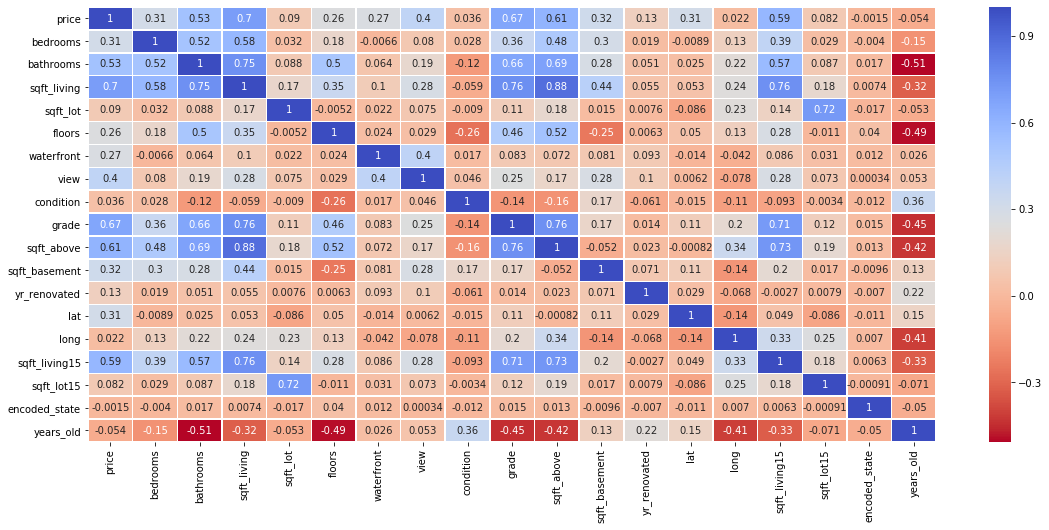

In [10]:
#Plotting the heatmap so that we can get the correlation between the different factors
fig = plt.figure(figsize=(19,8))
ax = fig.gca()
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot=True, ax=ax, linewidths=.5)
plt.show()

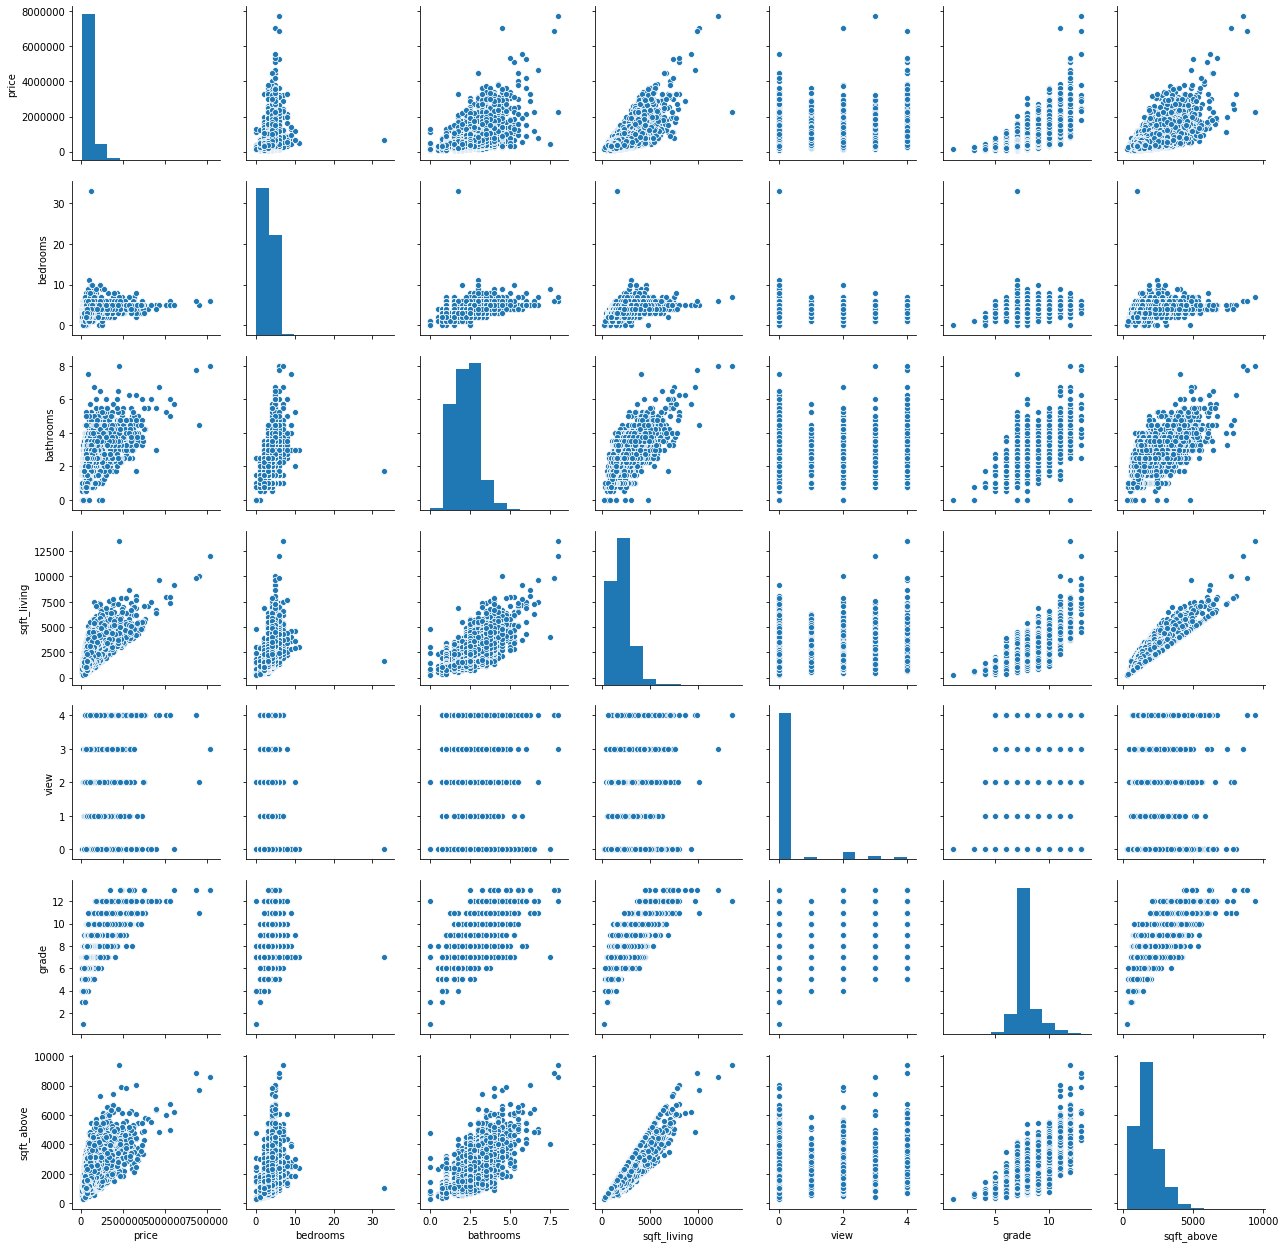

In [11]:
#why in this case we are using [[]]?
sns.pairplot(df[['price','bedrooms', 'bathrooms', 'sqft_living', 'view', 'grade', 'sqft_above']])

In [12]:
#assigning the x and y values for the linear regression
x = df.drop('price', axis=1)
y = df['price']

In [14]:
#Splitting the training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y , test_size=0.2, random_state = 42)

In [17]:
# In this case, why are we normalizing all the values? Is there an reason for this?
from sklearn.linear_model import LinearRegression
reg = LinearRegression(normalize = True)
reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [18]:
reg.score(X_test, Y_test)

0.7009450390140155